<a href="https://colab.research.google.com/github/Usermer/deep-learning-universe/blob/main/01_neural_networks_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ANN*** (artificial neural network)

Un ANN (réseau de neurones artificiel) est un modèle mathématique inspiré du cerveau humain 🧍‍♂️🧠.
Il est composé de neurones artificiels qui collaborent pour apprendre à reconnaître des motifs, faire des prédictions ou prendre des décisions à partir de données.

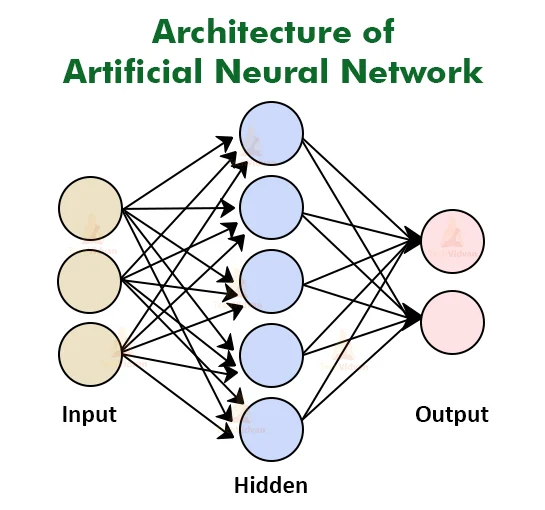

***Perceptron***:Le perceptron est le plus simple modèle de neurone artificiel.
Un perceptron est un neurone unique qui :

prend des entrées (**features**),

les pondère avec des poids (**weights**),

ajoute un biais (**bias**),

puis applique une **fonction d’activation** pour donner une sortie (0 ou 1).

✅Donc, il fait juste La **classification binaire**

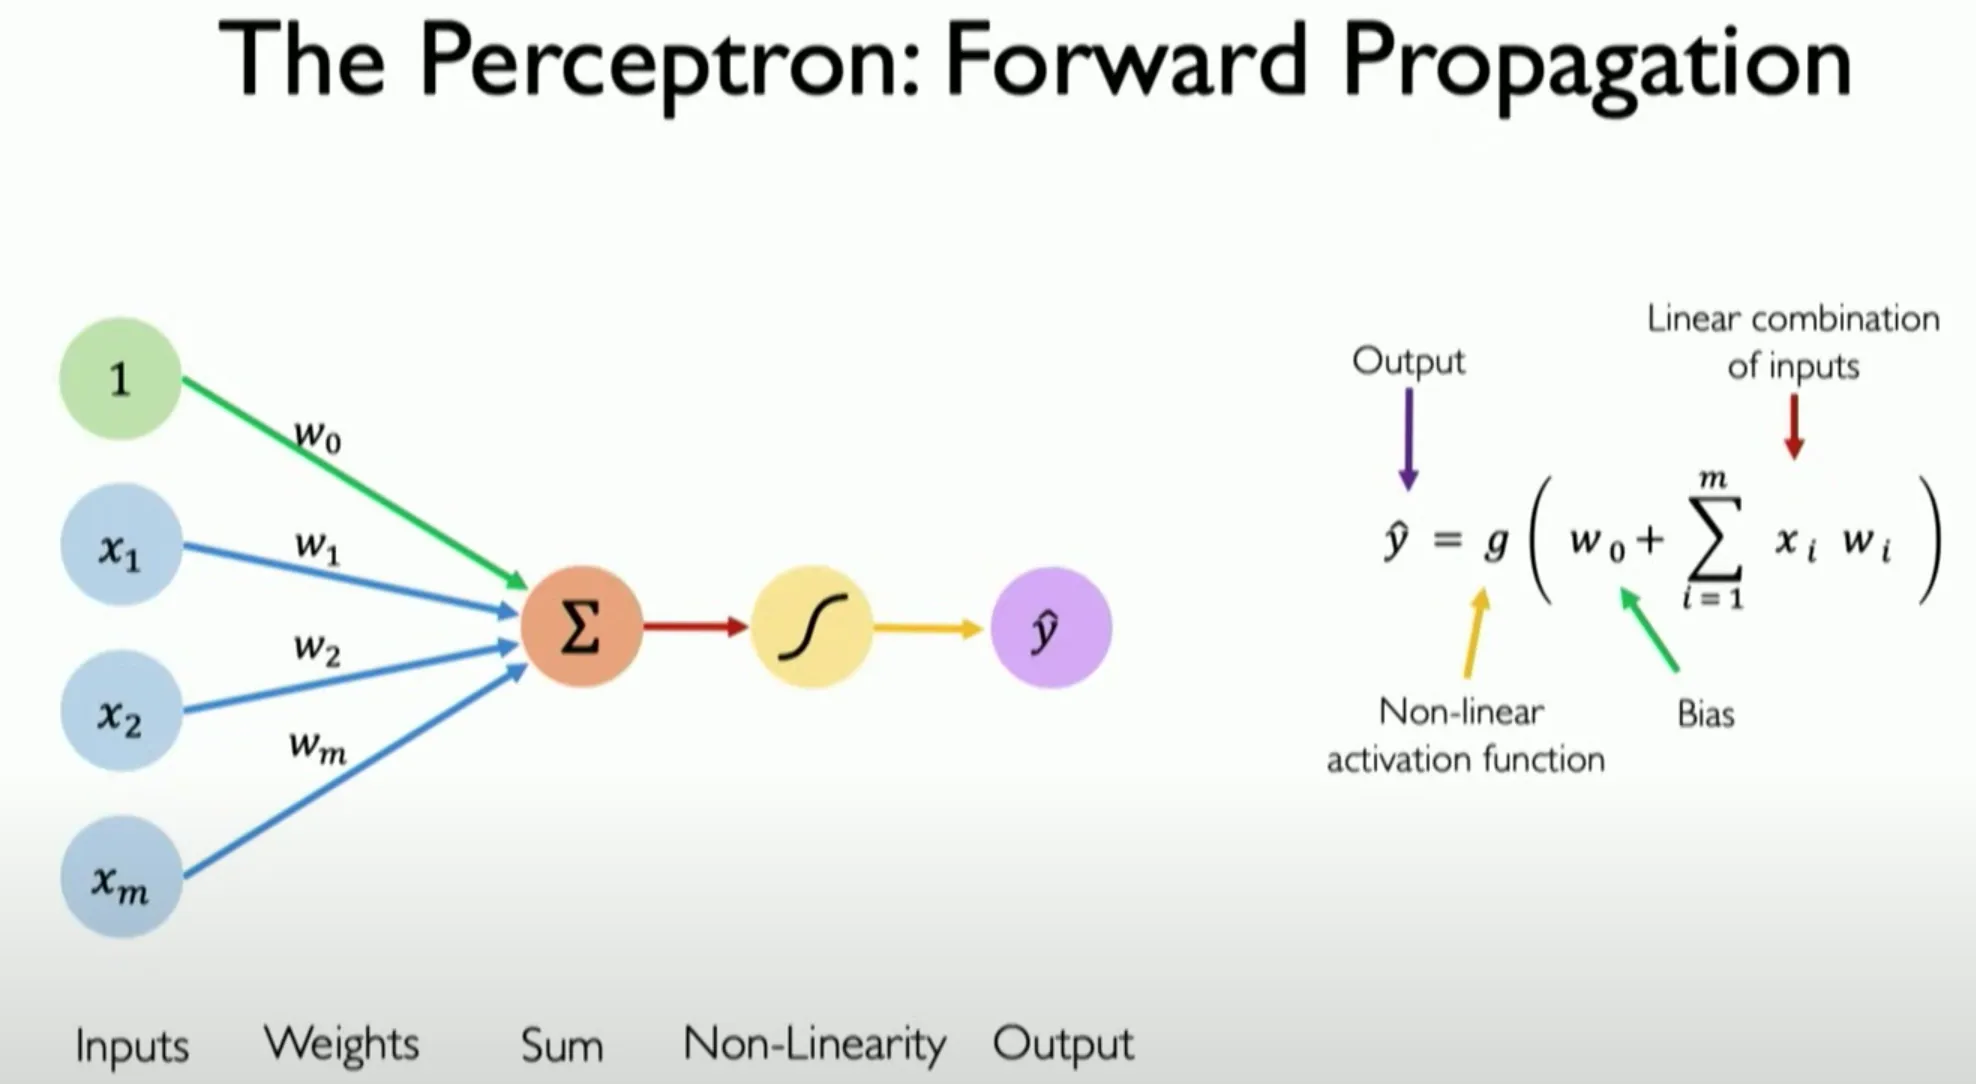

***TLU (Threshold Logic Unit)*** prend la somme pondérée des entrées ,puis applique un seuil (threshold)
✨La TLU agit donc comme une fonction d’activation binaire.
Elle transforme la somme pondérée en décision logique.
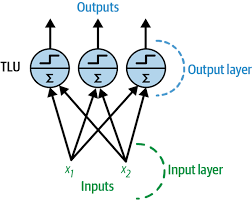

🧩 Phrase à retenir :

Le ***perceptron*** apprend les poids et le biais,
tandis que la ***TLU*** décide, via un seuil, si le neurone s’active ou non.

---



A perceptron is composed of ***one or more TLUs*** organized in a single layer,where every TLU is connected to every input.Such a layer is called a ***fully connected layer***

---



***Problème du TLU***


🔸 Avant (Perceptron classique – 1958)

Le perceptron utilisait une TLU comme fonction d’activation :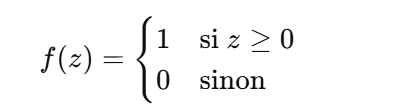

➡️ C’est une fonction de seuil brutale, donc la sortie est binaire (0 ou 1).

🔹Après (Perceptron moderne / Deep Learning)

On a remplacé la TLU par des fonctions d’activation continues, comme :
Sigmoid ,Tanh,ReLU(max(0,x))

Ces fonctions :

permettent** des sorties progressives **(pas juste 0 ou 1),

rendent le modèle différentiable (donc entraînable par gradient),

et introduisent de la non-linéarité (indispensable pour les problèmes complexes).


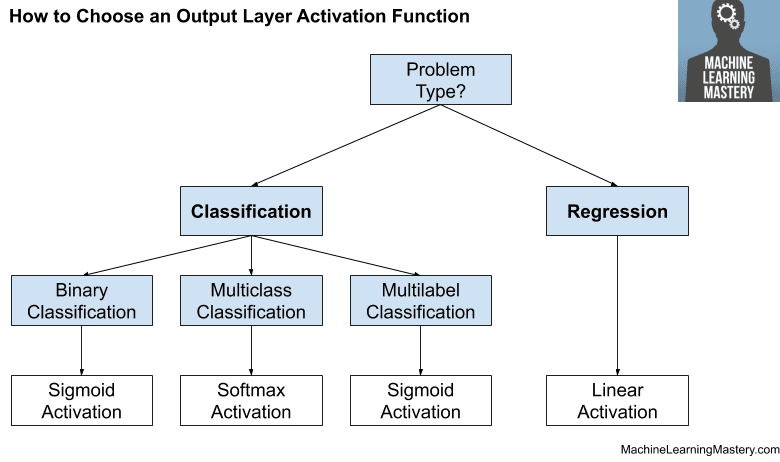

**Comment le perceptron apprend  ?
(the perceptron rule)**

1️⃣ Initialisation

-Poids 𝑤𝑖 et biais 𝑏
aléatoires

-Choisir un learning rate
𝜂(ex : 0.01 à 0.1)

2️⃣ Propagation avant (Forward pass)
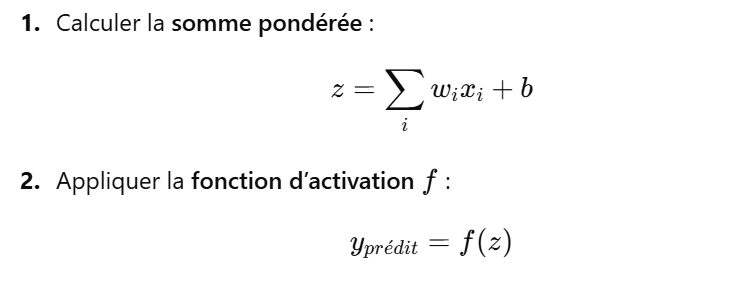

3️⃣ Calcul de l’erreur
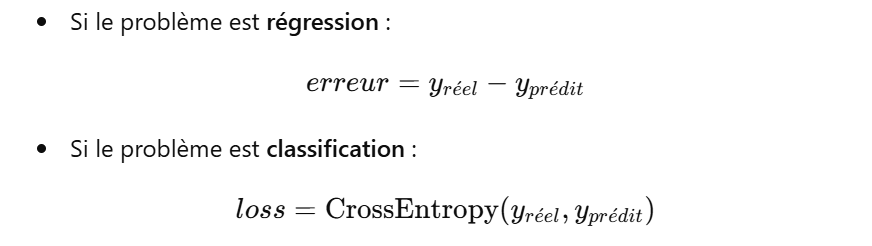

4️⃣ Rétropropagation (Backward pass)

Contrairement à la TLU, une fonction d’activation continue est différentiable, donc on peut calculer le gradient :
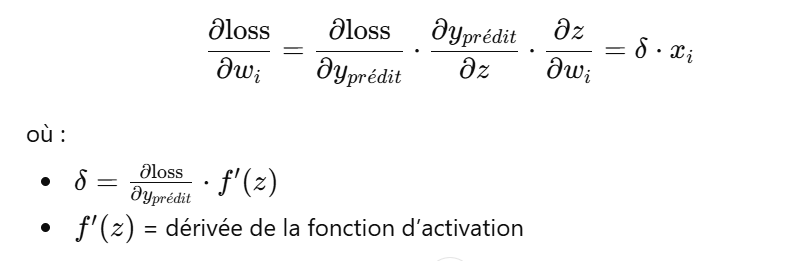

5️⃣ Mise à jour des poids et biais

On applique la descente de gradient :
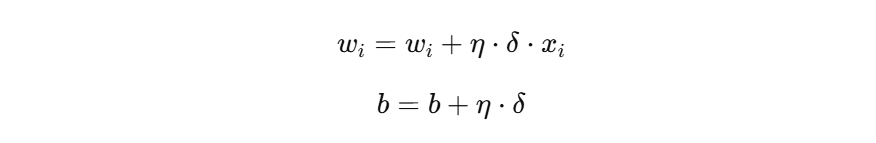
Le gradient indique dans quelle direction ajuster les poids pour réduire l’erreur.
6️⃣ Répétition

Répéter le forward + backward pour tous les exemples du dataset

Pendant plusieurs epochs jusqu’à convergence

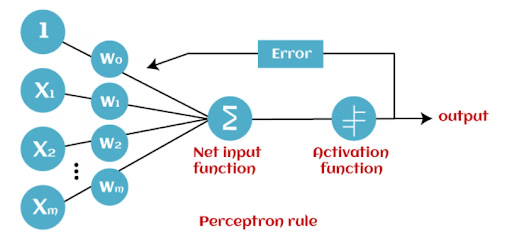

**`MLP (Multi-Layer Perceptron)`**

Un MLP (Multi-Layer Perceptron) est une extension du perceptron simple.

👉 C’est un réseau de neurones composé de plusieurs couches :

**1 input layer**,

1 layer ou plus de TLU formant un **hidden layer**

et 1 layer de TLUs constituant **output layer**


---


Chaque couche est constituée de plusieurs neurones, et chaque neurone d’une couche est connecté à tous les neurones de la couche suivante — c’est un réseau entièrement connecté (**fully connected network**).

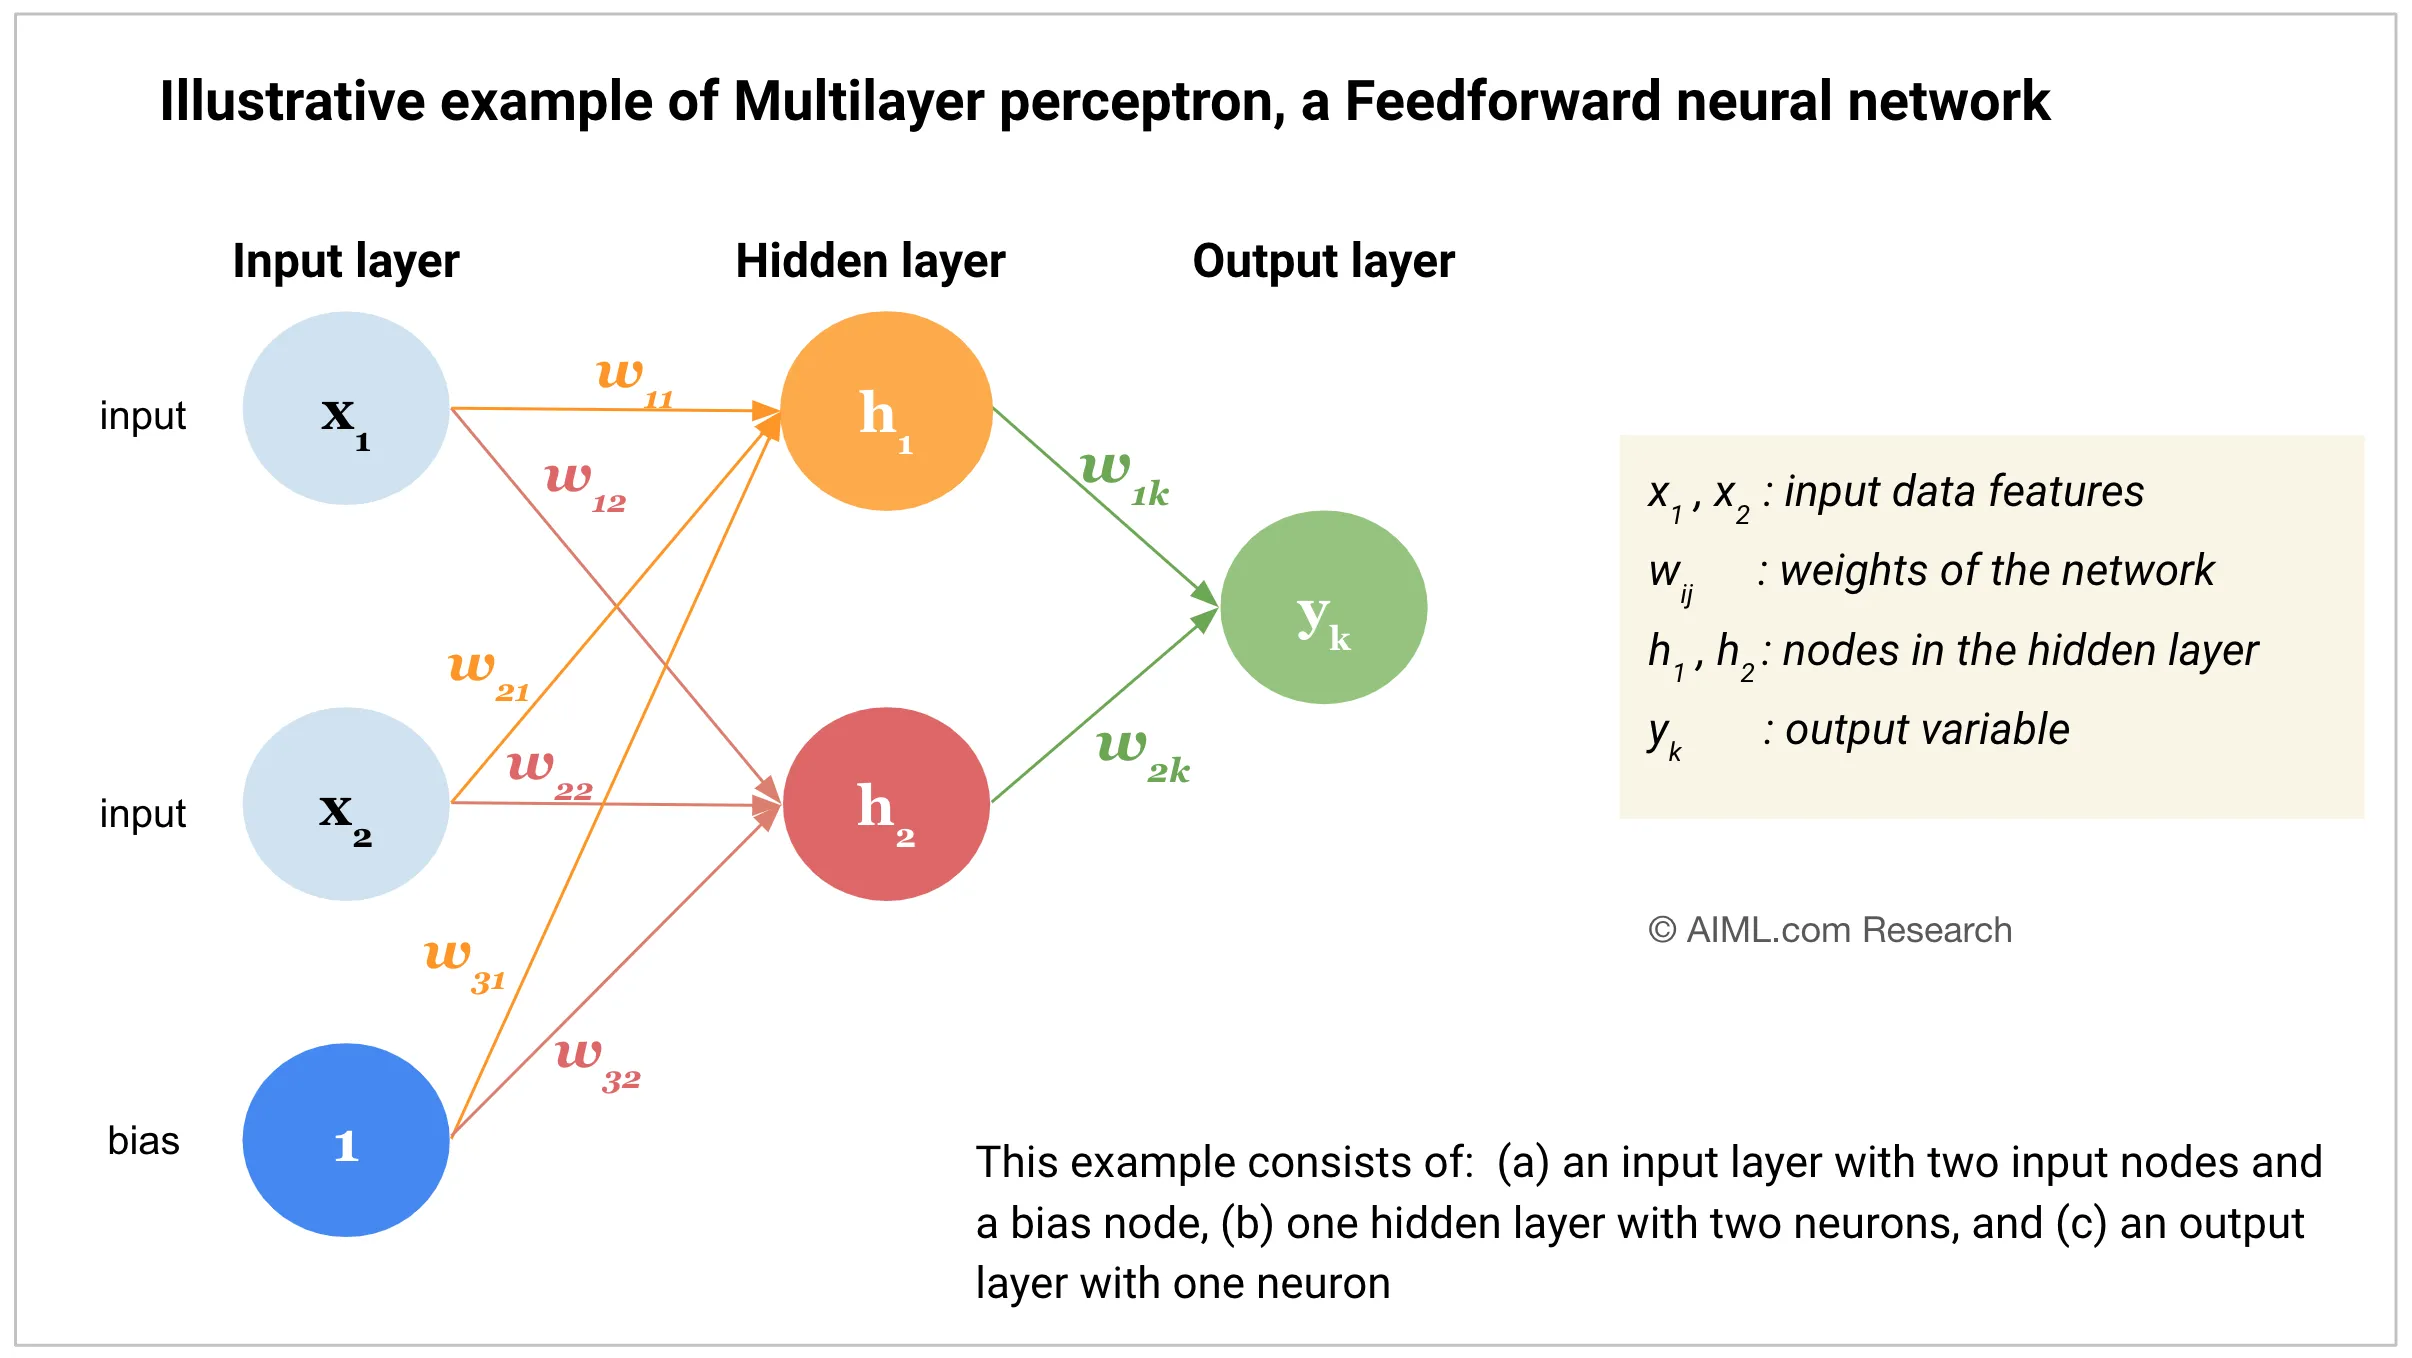

***Regression MLP***

`MLPRegressor `est une classe de la bibliothèque scikit-learn en Python. Elle implémente un Multi-Layer Perceptron (MLP) pour les tâches de régression.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error
import numpy as np


data=fetch_california_housing()

X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2,random_state=42)
mlpRegressor=MLPRegressor(hidden_layer_sizes=[50,50,50],random_state=42)
pipeline=make_pipeline(StandardScaler(),mlpRegressor)
pipeline.fit(X_train,y_train)

y_pred=pipeline.predict(X_test)
rmse=root_mean_squared_error(y_test,y_pred)
rmse

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5116099315483821